# Heat Treatment Project

## First step 
### Setting up the pressure and cost functions

In [49]:
import math

D_o = 2.3 * 10**(-5)
Q_d = 148000
R = 8.314

def pressure_function(params):
    temp = params[0]
    time = params[1]

    top_half = 0.6 - 0.3 * math.erf((0.2*10**(-3))/(2*math.sqrt(D_o*math.exp(-Q_d/(R*temp))*time)))
    bottom_half = (7*10**(-3))*(math.exp(-20000/(R*temp)))*(1-math.erf((0.2*10**(-3))/(2*math.sqrt(D_o*math.exp(-Q_d/(R*temp))*time))))
    
    return (top_half/bottom_half)**2

def cost_function(params):
    temp = params[0]
    time = params[1]
    return (time/60) + 0.095*(((temp-273.15 - 20)*time)/3600) + (0.75 * pressure_function(params) * time) / (3600*6894.76)


## Optimizing for maximum and minimum cost values

In [96]:
# now we can use scipy.optimize to find the minimum
from scipy.optimize import minimize

# initial guesses
initial_guess = [1000, 1800]

# show initial objective
print('Initial Objective: ' + str(cost_function(initial_guess)))

# optimize using scipy
# we want to minimize our cost function but we need to use SLSQP because we have constraints which is pressure 

temp_bound = (850 + 273.15, 950+273.15)
time_bound = (600, 3600*4) # I set the start bound higher because I don't want a division by 0 error

# constraints
# we want to make sure pressure is less than 170 psi
pressure_constraint = {'type': 'ineq', 'fun': lambda params: 170 - pressure_function(params) / 6894.76}


# optimize with high accuracy
solution = minimize(cost_function, initial_guess, method='SLSQP', bounds=[temp_bound, time_bound], constraints=[pressure_constraint], options={ 'ftol': 1e-12 })

print("Final Objective: " + str(cost_function(solution.x)))
print("Temperature: " + str(solution.x[0]))
print("Time: " + str(solution.x[1]))
print("Pressure: " + str(pressure_function(solution.x) / 6894.76))





Initial Objective: 105712225228706.31
Final Objective: 194.95236003101797
Temperature: 1223.15
Time: 2509.667427540371
Pressure: 169.99999999999994


In [101]:
initial_guess = [1000, 1800]

# show initial objective
print('Initial Objective: ' + str(cost_function(initial_guess)))

# optimize using scipy
# we want to maximize our cost function but we need to use SLSQP because we have constraints which is pressure

temp_bound = (850 + 273.15, 950+273.15)
time_bound = (600, 3600*4) # I set the start bound higher because I don't want a division by 0 error

# constraints
# we want to make sure pressure is less than 170 psi
pressure_constraint = {'type': 'ineq', 'fun': lambda params: 170 - pressure_function(params) / 6894.76}

# optimize with high accuracy
solution = minimize(lambda params: -cost_function(params), initial_guess, method='SLSQP', bounds=[temp_bound, time_bound], constraints=[pressure_constraint], options={ 'ftol': 1e-12 })

print("Final Objective: " + str(cost_function(solution.x)))
print("Temperature: " + str(solution.x[0]))
print("Time: " + str(solution.x[1]))
print("Pressure: " + str(pressure_function(solution.x) / 6894.76))



Initial Objective: 105712225228706.31
Final Objective: 1081.58462412666
Temperature: 1125.741116122789
Time: 14400.0
Pressure: 170.00000000000003


## Generating 3D plots

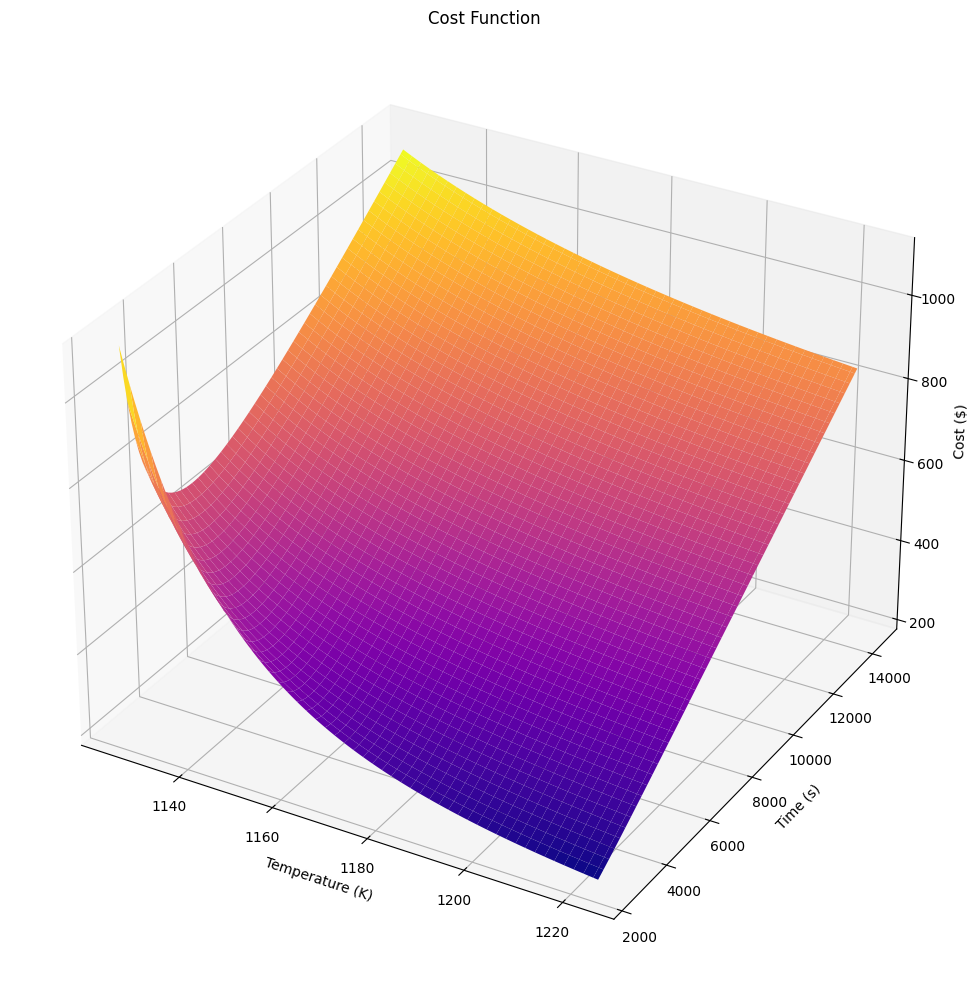

In [116]:
# now we have the maximum and minimum cost we can create a 3d plot of the cost function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# temperature range 1125.741116122789 - 1223.15 K
# time range 2509.667427540371 - 14400.0 s

# create a meshgrid of temperatures and times
temps = np.linspace(1125.741116122789, 1223.15, 100)
times = np.linspace(2509.667427540371, 14400.0, 100)

# create a meshgrid
X, Y = np.meshgrid(temps, times)

# calculate the cost function for each temperature and time
Z = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        Z[i][j] = cost_function([X[i][j], Y[i][j]])

# create a large figure
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# plot the surface
ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none')

# add labels
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Cost ($)')
ax.set_title('Cost Function')

# tight layout
plt.tight_layout()

